Clean data

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd

# Step 1: Load the CSV file
csv_file = "datasets/image_data.csv"  # Replace with the path to your CSV file
data = pd.read_csv(csv_file)

# Step 2: Add directory path to image paths
data['image_path'] = 'datasets/' + data['image_path']

# Step 3: Save the modified data to the same CSV file
data.to_csv(csv_file, index=False)

print("Directory path added successfully!")


Directory path added successfully!


Yolo detect clothes

In [ ]:
import torch

model = torch.hub.load('ultralytics/ultralytics', 'custom', path='predict_clothes.pt', force_reload=True)



0: 800x800 1 short, 1 skirt, 255.8ms
Speed: 6.0ms preprocess, 255.8ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)


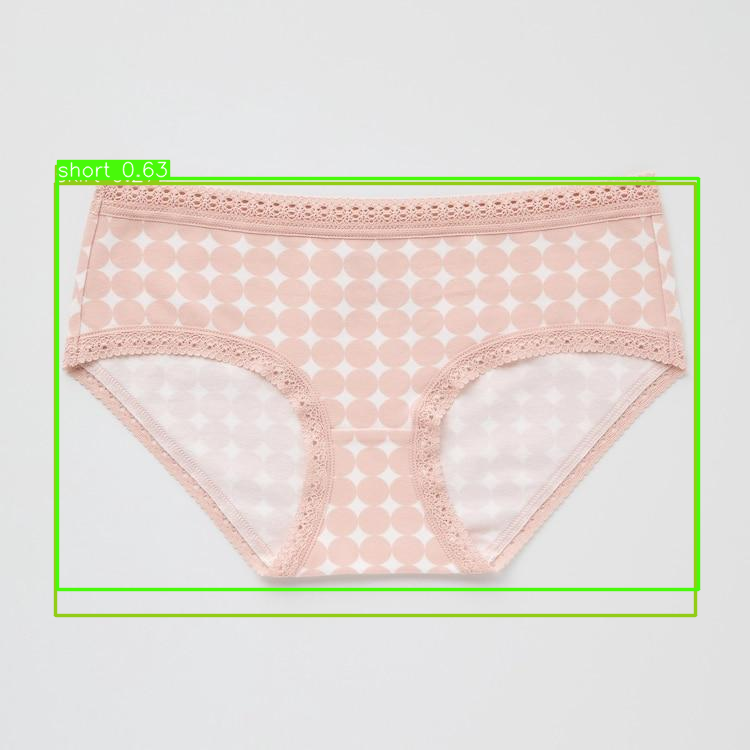

In [13]:
from ultralytics import YOLO
import cv2
from PIL import Image
import numpy as np
from IPython.display import display

# Load the custom YOLOv8 checkpoint
model = YOLO('predict_clothes.pt')

# Load an image
image_path = 'datasets\images\image_3073.jpg'
image = cv2.imread(image_path)

# Perform inference on the image
results = model(image)

# Visualize the results on the image
annotated_image = results[0].plot()

# Convert the annotated image from BGR to RGB color space
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Convert the annotated image to PIL Image
pil_image = Image.fromarray(annotated_image_rgb)

# Display the PIL Image in the output cell
display(pil_image)


In [ ]:
import os
from ultralytics import YOLO
import cv2

# Load the custom YOLOv8 checkpoint
model = YOLO('path/to/your/custom_checkpoint.pt')

# Specify the folder containing the images
folder_path = 'path/to/your/folder'

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        # Perform inference on the image
        results = model(image)
        
        # Check if any objects were detected
        if len(results[0].boxes) == 0:
            # No objects detected, remove the image
            os.remove(image_path)
            print(f"Removed image: {filename}")
        else:
            print(f"Kept image: {filename}")

In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torchvision

from datasets.UniqloDataset import UniqloDataset

#set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#load data
dataset = UniqloDataset(csv_file='datasets/image_data.csv', 
                        root_dir='datasets/imagesss', 
                        transform=transforms.ToTensor())


In [2]:
dataset_size = len(dataset)
dataset_size

3263

In [3]:
len_train = int(len(dataset)*0.8)

train_set, test_set = torch.utils.data.random_split(dataset, [len_train, len(dataset) - len_train])

In [4]:
train_set[0][0].shape

torch.Size([3, 750, 750])

In [37]:
print(dataset[0][1])


tensor(391000)


In [6]:
%pip install imagehash

Note: you may need to restart the kernel to use updated packages.


KeyboardInterrupt: 

In [5]:
import torch

# Load the checkpoint
checkpoint = torch.load('last.pt', map_location=torch.device(device))

# Print the keys in the checkpoint
print(checkpoint.keys())

dict_keys(['epoch', 'state_dict', 'optimizer'])


In [11]:
import csv

# Function to copy every 100th line from source file to destination file
def move_lines(source_file, destination_file):
    with open(source_file, 'r', newline='') as source_csv:
        with open(destination_file, 'a', newline='') as destination_csv:
            source_reader = csv.reader(source_csv)
            destination_writer = csv.writer(destination_csv)
            
            # Skip the first 4 lines in the source file
            for _ in range(1):
                next(source_reader)

            line_count = 0
            for row in source_reader:
                if line_count % 100 in range(5, 16):
                    destination_writer.writerow(row)
                line_count += 1

# Example usage:
source_file = 'datasets/image_data.csv'
destination_file = 'datasets/valid_data.csv'

move_lines(source_file, destination_file)


In [7]:
import os
import cv2
import shutil
from skimage.metrics import structural_similarity as ssim

def are_images_equal(img1, img2):
    # Convert images to grayscale for comparison
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Compute structural similarity index (SSIM)
    score = ssim(gray1, gray2)

    # Images are considered equal if SSIM score is high (close to 1)
    return score > 0.95

def move_matching_images(folder_path, reference_image_path):
    # Load the reference image
    reference_image = cv2.imread(reference_image_path)
    
    # Iterate over the images in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Load the image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            
            # Check if the image is similar to the reference image
            if are_images_equal(reference_image, image):
                # Move the image to a new folder
                new_folder_path = os.path.join(folder_path, 'matching_images')
                os.makedirs(new_folder_path, exist_ok=True)
                new_image_path = os.path.join(new_folder_path, filename)
                shutil.move(image_path, new_image_path)
                print(f"Moved image: {filename}")

# Example usage
folder_path = 'datasets\images'
reference_image_path = 'datasets\images\image_9.jpg'
move_matching_images(folder_path, reference_image_path)
# print(are_images_equal(cv2.imread('datasets\images\image_9.jpg'), cv2.imread('datasets\images\image_31.jpg')))


Moved image: image_20.jpg


KeyboardInterrupt: 

In [8]:
import torch
import os
import numpy as np
import torch
import time
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

from config import argument_parser, batch_trainer, valid_trainer
from datasets.UniqloDataset import UniqloDataset, get_transform
import torchvision.transforms as T
from resnet import resnet50, resnet101, resnext50_32x4d,resnet152,resnet18,resnet34
from Uniqlo import *



Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001C615320050>>
Traceback (most recent call last):
  File "d:\OneDrive - Hanoi University of Science and Technology\My Git\Uniqlo-price-prediction\.env\Lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [11]:
%pwd

'd:\\OneDrive - Hanoi University of Science and Technology\\My Git\\Uniqlo-price-prediction'

In [19]:
import torch
import os
import numpy as np
import torch
import time
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

from config import argument_parser, batch_trainer, valid_trainer
from datasets.UniqloDataset import UniqloDataset, get_transform
import torchvision.transforms as T
from resnet import resnet50, resnet101, resnext50_32x4d,resnet152,resnet18,resnet34
from Uniqlo import *

from PIL import Image


backbone = resnet18()
model = Uniqlo(backbone)

model_path = 'v1.pt'  # luu dia chi cua model
checkpoint = torch.load(model_path, map_location=torch.device('cpu'))

model.load_state_dict(checkpoint['state_dict'])


# Define the transformation pipeline
transform = T.Compose([
    T.ToTensor()  # Convert PIL image to PyTorch tensor
])

# Load the image
img_path = 'datasets/images/image_2561.jpg'
img = Image.open(img_path)

# Apply the transformation
img_tensor = transform(img)

model.eval()
print(model(img_tensor.unsqueeze(0)))


tensor([[420679.5625]], grad_fn=<AddmmBackward0>)


In [23]:
import os
import shutil

def consolidate_images(source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Traverse through the source folder and its subfolders
    for root, _, files in os.walk(source_folder):
        for file in files:
            # Check if the file is a JPEG image
            if file.lower().endswith('.jpg'):
                # Construct the source and destination paths
                source_path = os.path.join(root, file)
                destination_path = os.path.join(destination_folder, file)

                # Copy the image to the destination folder
                shutil.copyfile(source_path, destination_path)
                print(f"Copied {source_path} to {destination_path}")

# Example usage
source_folder = 'dataaa'
destination_folder = 'data_data'
consolidate_images(source_folder, destination_folder)


Copied dataaa\test\VND146.000\1213.jpg to data_data\1213.jpg
Copied dataaa\test\VND146.000\1255.jpg to data_data\1255.jpg
Copied dataaa\test\VND146.000\3050.jpg to data_data\3050.jpg
Copied dataaa\test\VND146.000\3051.jpg to data_data\3051.jpg
Copied dataaa\test\VND146.000\3054.jpg to data_data\3054.jpg
Copied dataaa\test\VND146.000\3061.jpg to data_data\3061.jpg
Copied dataaa\test\VND146.000\3065.jpg to data_data\3065.jpg
Copied dataaa\test\VND146.000\3066.jpg to data_data\3066.jpg
Copied dataaa\test\VND146.000\3073.jpg to data_data\3073.jpg
Copied dataaa\test\VND146.000\3081.jpg to data_data\3081.jpg
Copied dataaa\test\VND146.000\3085.jpg to data_data\3085.jpg
Copied dataaa\test\VND195.000\2704.jpg to data_data\2704.jpg
Copied dataaa\test\VND195.000\2705.jpg to data_data\2705.jpg
Copied dataaa\test\VND195.000\3004.jpg to data_data\3004.jpg
Copied dataaa\test\VND195.000\3011.jpg to data_data\3011.jpg
Copied dataaa\test\VND195.000\3017.jpg to data_data\3017.jpg
Copied dataaa\test\VND24

In [32]:
import os
import csv

def create_image_price_csv(source_folder, output_file):
    # Open the CSV file for writing
    with open(output_file, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Image Name', 'Price'])

        # Traverse through the source folder and its subfolders
        for root, dirs, files in os.walk(source_folder):
            # Extract the category (price) from the folder name
            category = os.path.basename(root)
            
            # Iterate through the image files in the current folder
            for file in files:
                if file.lower().endswith('.jpg') or file.lower().endswith('.jpeg') or file.lower().endswith('.png'):
                    # Write the image name and its corresponding price to the CSV file
                    image_name = os.path.splitext(file)[0]
                    csv_writer.writerow([image_name, category])

# Example usage
source_folder = 'dataaa/valid'
output_file = 'csv_file/mage_prices3.csv'
create_image_price_csv(source_folder, output_file)


In [35]:
import csv

def scale_prices(input_file, output_file):
    # Read the CSV file and parse each row
    with open(input_file, 'r', newline='') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        rows = list(csv_reader)

    # Scale the prices by dividing by 100,000
    for row in rows:
        row['Price'] = int(row['Price']) / 100000

    # Write the modified data back to the CSV file
    with open(output_file, 'w', newline='') as csvfile:
        fieldnames = ['Image Name', 'Price']
        csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        csv_writer.writeheader()
        csv_writer.writerows(rows)

# Example usage
input_file = 'csv_file\image.csv'
output_file = 'csv_file\image_scale.csv'
scale_prices(input_file, output_file)


In [36]:
import csv

def split_csv(input_file, output_train_file, output_valid_file):
    # Read the CSV file and parse each row
    with open(input_file, 'r', newline='') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        rows = list(csv_reader)

    # Write the rows to the train and valid files
    with open(output_train_file, 'w', newline='') as train_csvfile, open(output_valid_file, 'w', newline='') as valid_csvfile:
        fieldnames = ['Image Name', 'Price']
        train_csv_writer = csv.DictWriter(train_csvfile, fieldnames=fieldnames)
        valid_csv_writer = csv.DictWriter(valid_csvfile, fieldnames=fieldnames)

        train_csv_writer.writeheader()
        valid_csv_writer.writeheader()

        for i, row in enumerate(rows):
            if i % 100 < 20:
                valid_csv_writer.writerow(row)
            else:
                train_csv_writer.writerow(row)

# Example usage
input_file = 'datasets\image_data.csv'
output_train_file = 'datasets\image_train.csv'
output_valid_file = 'datasets\image_valid.csv'
split_csv(input_file, output_train_file, output_valid_file)


In [1]:
import torch

# Load the checkpoint
checkpoint = torch.load('v1.pt', map_location=torch.device('cpu'))

# Extract state dictionary
state_dict = checkpoint['state_dict']

# Save state dictionary to a new file
torch.save(state_dict, 'model_state_dict.pt')
